# Regresja wielomianowa

In [17]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

import statsmodels.api as sm

Poniżej znajduje się wykres pewnego wielomianu na odcinku $[0,3]$, który będziemy chcieli przybliżyć, używając modelu regresji liniowej.

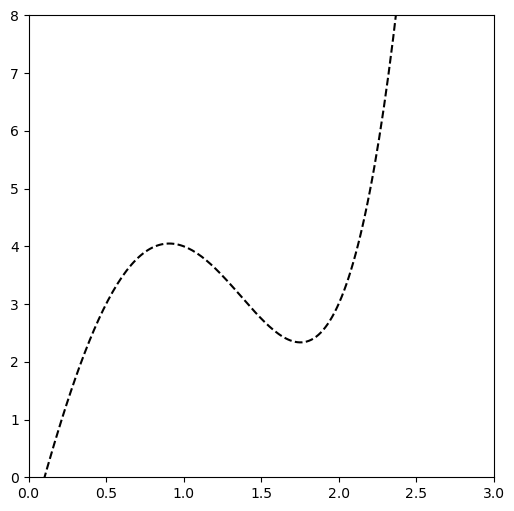

In [18]:
f = lambda x: ((x*2-1)*(x**2-2)*(x-2)+3)
x_tr = np.linspace(0, 3, 200)
y_tr = f(x_tr)
plt.figure(figsize=(6,6))
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,8])
plt.plot(x_tr[:200], y_tr[:200], '--k')
plt.show()

Wylosujemy teraz kilka punktów z otoczenia funkcji $y=f(x)$. Pary $(x,y)$ będą tworzyć nasz zbiór treningowy.

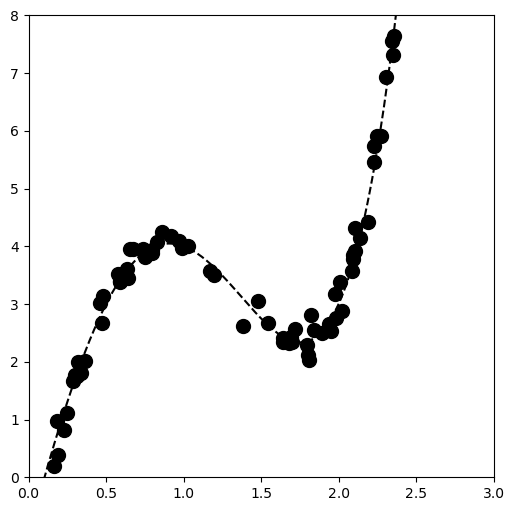

In [19]:
x = stats.uniform(0,3).rvs(100)
y = f(x) + stats.norm(0,0.2).rvs(len(x))
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,8])
plt.plot(x_tr, y_tr, '--k');
plt.plot(x, y, 'ok', ms=10);
plt.show()

Nauczmy prosty model regresji liniowej opisany równaniem:

$$
y=a\cdot x + b + \epsilon,
$$
gdzie $\epsilon$ to nieredukowalny błąd, o którym zakładamy, że pochodzi ze standardowego rozkładu normalnego. Wyestymujmy współczynniki oraz narysujmy prostą regresji.

In [20]:
M1 = np.vstack( (np.ones_like(x), x) ).T
p1 = np.linalg.lstsq(M1, y, rcond=None)

Definiujemy naszą funkcję regresji

In [21]:
f_lr_1 = lambda x: p1[0][1] * x +p1[0][0]

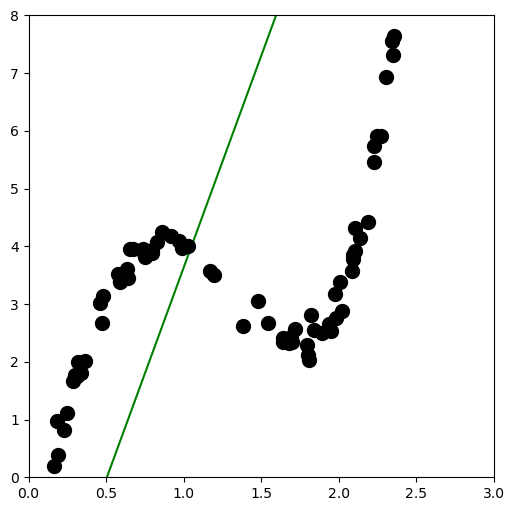

In [22]:
x_f_lr_1 = np.linspace(0., 3, 200)
y_f_lr_1 = f_lr_1(x_tr)
plt.figure(figsize=(6,6))
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,8])
plt.plot(x_f_lr_1, y_f_lr_1, 'g')
plt.plot(x, y, 'ok', ms=10)
plt.show()

## Zadanie 1 (1 punkt)
Proszę dopasować krzywą regresji opisaną wzorem

$$
y=a_1\cdot x + a_2 \cdot x^2 + b
$$

do naszych danych oraz narysować krzywą regresji.

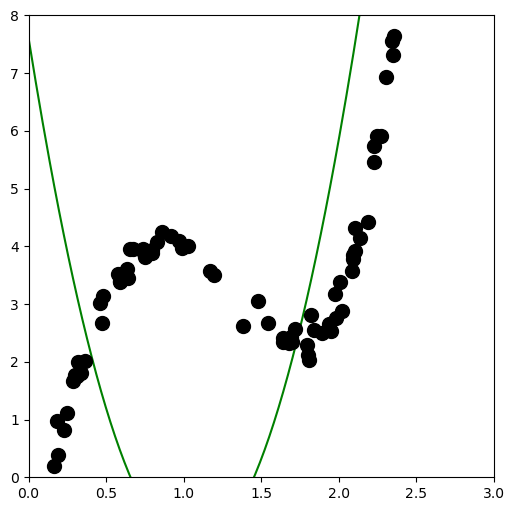

In [23]:




M2 = np.vstack( (np.ones_like(x), x , x*x) ).T
p2 = np.linalg.lstsq(M2, y, rcond=None)


f_lr_2 = lambda x: p2[0][2]* x * x +p2[0][1]* x + p2[0][0]

x_f_lr_2 = np.linspace(0., 3, 200)
y_f_lr_2 = f_lr_2(x_tr)
plt.figure(figsize=(6,6))
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,8])
plt.plot(x_f_lr_2, y_f_lr_2, 'g')
plt.plot(x, y, 'ok', ms=10)
plt.show()



## Zadanie 2 (1 punkt)
Proszę wykonać zadane nr 1, dopasowując taką krzywą regresji:

$$
y=a_1\cdot x + a_2 \cdot x^2 + a_3 \cdot x ^3 + b
$$

do naszych danych oraz narysować krzywą regresji.

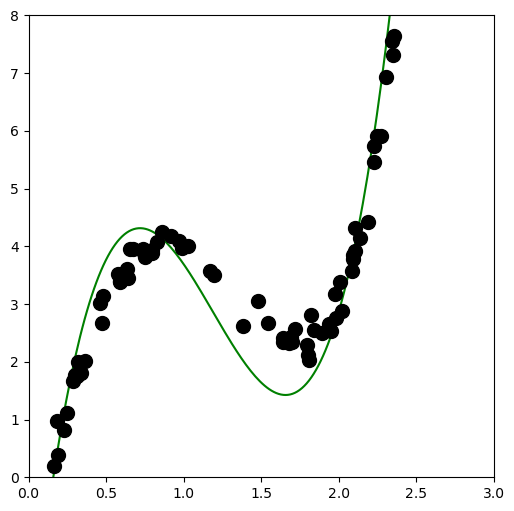

In [24]:

M3 = np.vstack( (np.ones_like(x), x , x**2 , x**3) ).T
p3 = np.linalg.lstsq(M3, y, rcond=None)


f_lr_3 = lambda x: p3[0][3] * x**3 +  p3[0][2]* x**2 +p3[0][1]* x + p3[0][0]

x_f_lr_3 = np.linspace(0., 3, 200)
y_f_lr_3 = f_lr_3(x_tr)
plt.figure(figsize=(6,6))
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,8])
plt.plot(x_f_lr_3, y_f_lr_3, 'g')
plt.plot(x, y, 'ok', ms=10)
plt.show()


## Zadanie 3 (2 punkty)
Porównaj ze sobą otrzymane krzywe aproksymujące oryginalną funkcję. Która z nich jest najlepsza? Użyj sensownej miary, by to zbadać, np. $R^2$, $R_{\text{adj}}^2$, F statystyka.

Wskazówka: zapoznaj się z pakietem _statsmodel.api_

In [25]:
from sklearn.metrics import r2_score

# Prawdziwe wartości bez szumu
y_true = f(x)

# Predykcje
y_pred_1 = f_lr_1(x)
y_pred_2 = f_lr_2(x)
y_pred_3 = f_lr_3(x)

r2_1 = r2_score(y_true, y_pred_1)
r2_2 = r2_score(y_true, y_pred_2)
r2_3 = r2_score(y_true, y_pred_3)

print(f"R² dla modelu liniowego: {r2_1:.4f}")
print(f"R² dla modelu kwadratowego: {r2_2:.4f}")
print(f"R² dla modelu sześciennego: {r2_3:.4f}")






def adjusted_r2(r2, n, k):
    return 1 - (1 - r2) * (n - 1) / (n - k - 1)

n = len(x)

r2_1_adj = adjusted_r2(r2_1, n, k=1)
r2_2_adj = adjusted_r2(r2_2, n, k=2)
r2_3_adj = adjusted_r2(r2_3, n, k=3)

print()
print(f"Adjusted R² (model 1): {r2_1_adj:.4f}")
print(f"Adjusted R² (model 2): {r2_2_adj:.4f}")
print(f"Adjusted R² (model 3): {r2_3_adj:.4f}")





def f_statistic(r2, n, k):
    numerator = (r2 / k)
    denominator = (1 - r2) / (n - k - 1)
    return numerator / denominator

n = len(x)
f_stat_1 = f_statistic(r2_1, n, k=1)
f_stat_2 = f_statistic(r2_2, n, k=2)
f_stat_3 = f_statistic(r2_3, n, k=3)

print()
print(f"F-statystyka (model 1): {f_stat_1:.4f}")
print(f"F-statystyka (model 2): {f_stat_2:.4f}")
print(f"F-statystyka (model 3): {f_stat_3:.4f}")





R² dla modelu liniowego: 0.5294
R² dla modelu kwadratowego: 0.8474
R² dla modelu sześciennego: 0.9940

Adjusted R² (model 1): 0.5246
Adjusted R² (model 2): 0.8442
Adjusted R² (model 3): 0.9938

F-statystyka (model 1): 110.2453
F-statystyka (model 2): 269.2813
F-statystyka (model 3): 5304.8043


In [26]:
import statsmodels.api as sm

# Modele statystyczne na bazie wcześniej zbudowanych macierzy
model1 = sm.OLS(y, M1).fit()
model2 = sm.OLS(y, M2).fit()
model3 = sm.OLS(y, M3).fit()

# Podsumowania statystyczne
print("Model 1:\n", model1.summary())
print("Model 2:\n", model2.summary())
print("Model 3:\n", model3.summary())


Model 1:
                             OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.531
Model:                            OLS   Adj. R-squared:                  0.526
Method:                 Least Squares   F-statistic:                     110.8
Date:                Sun, 06 Apr 2025   Prob (F-statistic):           8.79e-18
Time:                        20:19:57   Log-Likelihood:                -328.22
No. Observations:                 100   AIC:                             660.4
Df Residuals:                      98   BIC:                             665.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.7022      1.280     -2.89

## Zadanie 4 (3 punkty)
Wykonaj regresję za pomocą metody **statsmodels.formula.api.ols**, tak by wynik na zbiorze testowym był jak najlepszy dla zbioru Boston. Użyj sensownej metryki do zbadania jakości dopasowania krzywej regresyjnej.

In [27]:
# Ładujemy dataset
data_url = "http://lib.stat.cmu.edu/datasets/boston"
boston = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([boston.values[::2, :], boston.values[1::2, :2]])
target = boston.values[1::2, 2]

In [28]:
# Preprocessing

bos=pd.DataFrame(data)
feature_name = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO','B', 'LSTAT']
bos.columns = feature_name
bos['PRICE']=target # To jest nasza zmienna zależna
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [29]:


X = sm.add_constant(data)         # dodaje bias (kolumnę z 1)
y = bos['PRICE']                  # target

model = sm.OLS(y, X).fit()
print(model.summary())




                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sun, 06 Apr 2025   Prob (F-statistic):          6.72e-135
Time:                        20:20:00   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.0

In [30]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Podział na zbiór treningowy i testowy
train, test = train_test_split(bos, test_size=0.3, random_state=42)

# Model regresji (wszystkie cechy)
formula = 'PRICE ~ ' + ' + '.join(feature_name)
model = smf.ols(formula=formula, data=train).fit()

# Predykcja
y_pred = model.predict(test)
y_true = test['PRICE']

# Metryki
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_true, y_pred)
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100  # tylko jeśli y_true > 0

# Wyniki
print(model.summary())
print()
print(f"MAE:  {mae:.4f}")
print(f"MSE:  {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAPE: {mape:.2f}%")
print(f"R² na zbiorze testowym: {r2:.4f}")


                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     75.81
Date:                Sun, 06 Apr 2025   Prob (F-statistic):           4.96e-92
Time:                        20:20:01   Log-Likelihood:                -1053.8
No. Observations:                 354   AIC:                             2136.
Df Residuals:                     340   BIC:                             2190.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     31.6311      6.056      5.223      0.0

## Zadanie 5 (3 punkty)
Wykonaj zadanie nr 4, ale dla danych reklamowych i wykorzystując jedynie dwa predyktory.

In [31]:
df_adv = pd.read_csv('https://raw.githubusercontent.com/przem85/bootcamp/master/statistics/Advertising.csv', index_col=0)
df_adv.head()



adv = pd.DataFrame(df_adv)
names = ['TV', 'RAD', 'NEWS', 'SALES']
adv.columns = names
adv.head()



predictors = adv.iloc[:, :2]        # pierwsze 2 kolumny (TV i RAD)
sales = adv[['SALES']]        # tylko kolumna SALES jako DataFrame


combined = pd.concat([predictors, sales], axis=1)
combined



,TV,RAD,SALES
1,230.1,37.8,22.1
2,44.5,39.3,10.4
3,17.2,45.9,9.3
4,151.5,41.3,18.5
5,180.8,10.8,12.9
...,...,...,...
196,38.2,3.7,7.6
197,94.2,4.9,9.7
198,177.0,9.3,12.8
199,283.6,42.0,25.5


In [32]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Podział na zbiór treningowy i testowy
train, test = train_test_split(combined, test_size=0.2, random_state=42)

# Model regresji (wszystkie cechy)
formula = 'SALES ~ ' + ' + '.join( predictors.columns )
model = smf.ols(formula=formula, data=train).fit()

# Predykcja
y_pred = model.predict(test)
y_true = test['SALES']

# Metryki
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_true, y_pred)
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100  # tylko jeśli y_true > 0

# Wyniki
print(model.summary())
print()
print(f"MAE:  {mae:.4f}")
print(f"MSE:  {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAPE: {mape:.2f}%")
print(f"R² na zbiorze testowym: {r2:.4f}")

                            OLS Regression Results                            
Dep. Variable:                  SALES   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     673.4
Date:                Sun, 06 Apr 2025   Prob (F-statistic):           9.30e-78
Time:                        20:20:02   Log-Likelihood:                -306.72
No. Observations:                 160   AIC:                             619.4
Df Residuals:                     157   BIC:                             628.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.0283      0.330      9.188      0.0